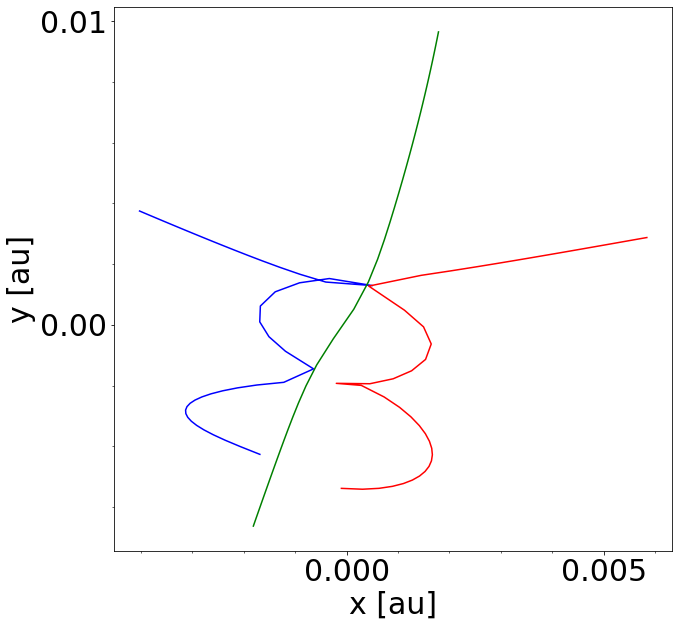

In [4]:
# the following fixes are highly recommended

#allow oversubscription for openMPI
import os
os.environ["OMPI_MCA_rmaps_base_oversubscribe"]="true"

# use lower cpu resources for idle codes
from amuse.support import options
options.GlobalOptions.instance().override_value_for_option("polling_interval_in_milliseconds", 10)

import numpy as np
from amuse.lab import Particles, units, Brutus, Huayno, nbody_system
from matplotlib import pyplot

###################### 
def three_bodies(X,V):
    bodies = Particles(3)
    bodies.mass = 1.0 | units.MEarth
    bodies.radius = 1.0 | units.REarth
    bodies.position = X |units.AU
    bodies.velocity = V | (units.kms)

    bodies.move_to_center()
    return bodies

#################################
def integrate_brutus(B0,end_time):
    converter = nbody_system.nbody_to_si(units.MEarth,units.REarth)
    gravity = Brutus(converter)

    gravity.particles.add_particles(B0)

    B = gravity.particles
    B_XYZ = []

    while gravity.model_time < end_time:
        gravity.evolve_model(gravity.model_time + (1 | units.day))
        B_XYZ_i = [ [b.x.value_in(units.AU),b.y.value_in(units.AU),b.z.value_in(units.AU)] for b in B]
        B_XYZ.append(B_XYZ_i)

    gravity.stop()
    return np.array(B_XYZ)

##########################
def plot_track(B_XYZ):

    figure = pyplot.figure(figsize=(10, 10))
    pyplot.rcParams.update({'font.size': 30})
    plot = figure.add_subplot(1,1,1)
    ax = pyplot.gca()
    ax.minorticks_on() 
    ax.locator_params(nbins=3)

    pyplot.xlabel('x [au]')
    pyplot.ylabel('y [au]')

    plot.plot(B_XYZ[:,0,0],B_XYZ[:,0,1], color = 'b')
    plot.plot(B_XYZ[:,1,0],B_XYZ[:,1,1], color = 'r')
    plot.plot(B_XYZ[:,2,0],B_XYZ[:,2,1], color = 'g')
    pyplot.show()

##################################################
p = np.random.uniform(-0.01,0.01,(3,3)).tolist()
v = np.random.uniform(-0.001,0.001,(3,3)).tolist()
end_time = 50 | units.day

B0 = three_bodies(p,v)
B_XYZ = integrate_brutus(B0,end_time)
plot_track(B_XYZ)
